In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.shape

(29020, 18)

In [8]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.duplicated().sum()

7661

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(21359, 18)

In [12]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
## checking the columns value counts
df["no_of_adults"].value_counts()
df["no_of_children"].value_counts()
df["no_of_weekend_nights"].value_counts()
df["type_of_meal_plan"].value_counts()
df["required_car_parking_space"].value_counts()
df["room_type_reserved"].value_counts()
df["arrival_year"].value_counts()
df["market_segment_type"].value_counts()
## check for more
df["booking_status"].value_counts() ## here data is imbalanced as we have many rows for not canceled and few for canceled

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

Our Data is Imbalanced

In [14]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date']

In [15]:
## lets check if we are not missing any columns
len(cat_cols)

6

In [16]:
len(num_cols)
## 18 thats fine

12

# Data Analysis

In [17]:
data = df.copy() ## so that our main dataFrame do not get affected

In [18]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


## Univariate Analysis

In [19]:
## we will be doing univariate analysis of all the numerical columns

def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes =[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")
        
        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    plt.tight_layout()
    plt.show()
        

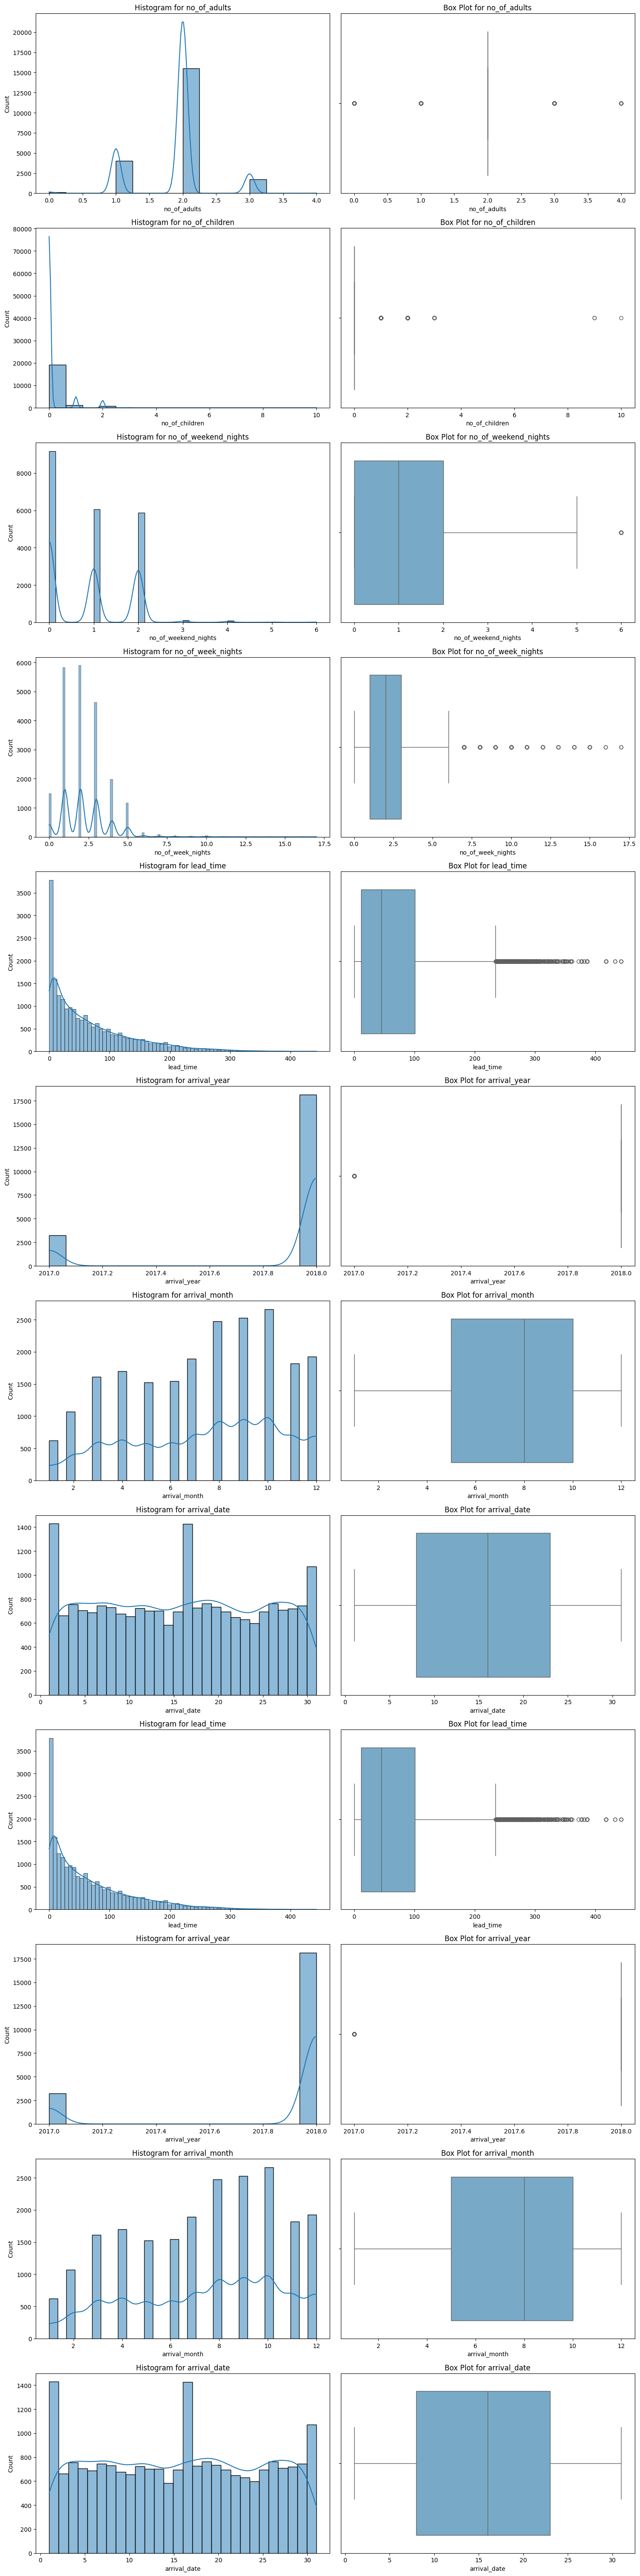

In [20]:
num_plot_dist(data, num_cols)

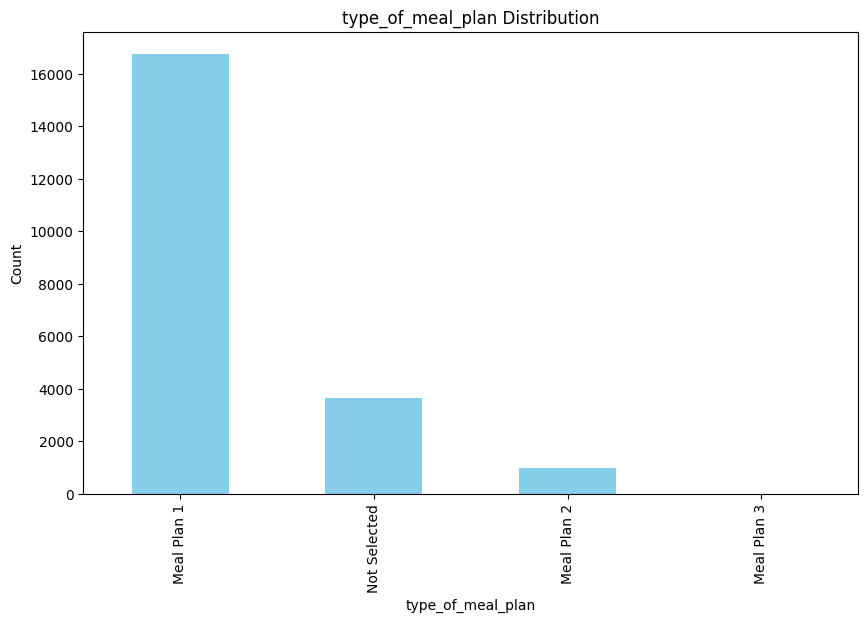

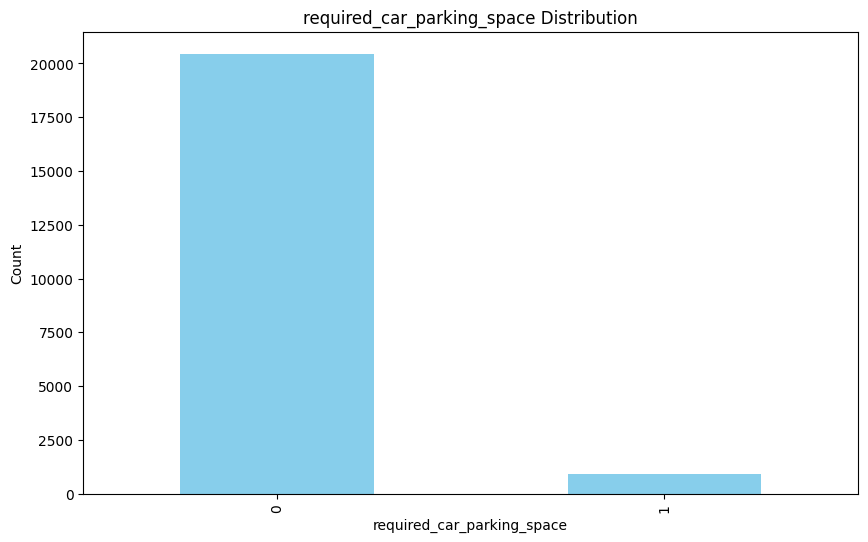

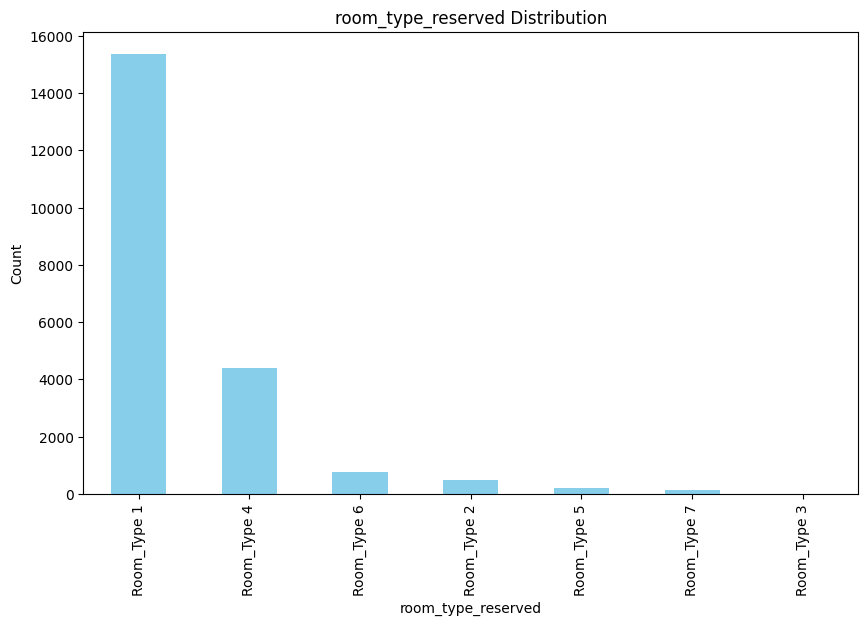

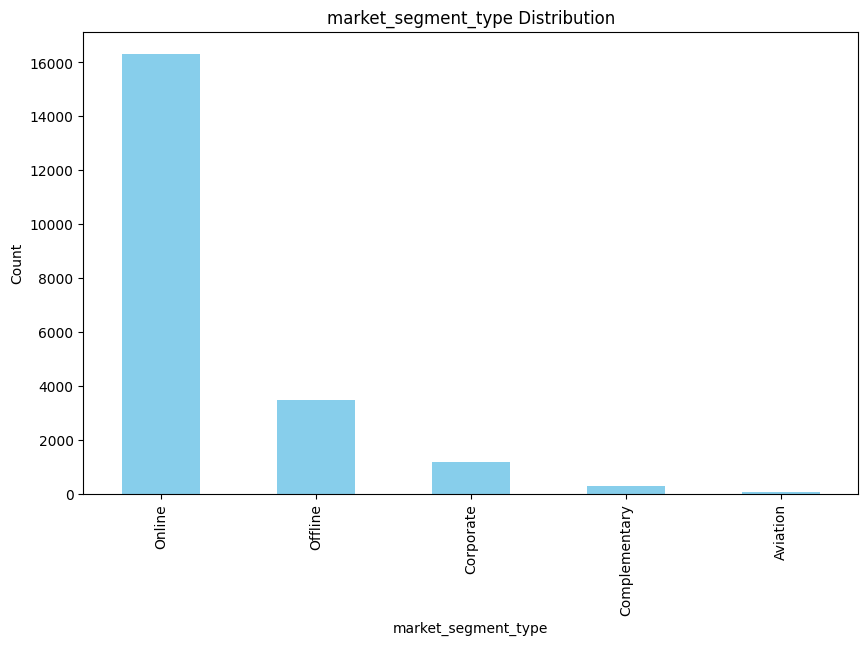

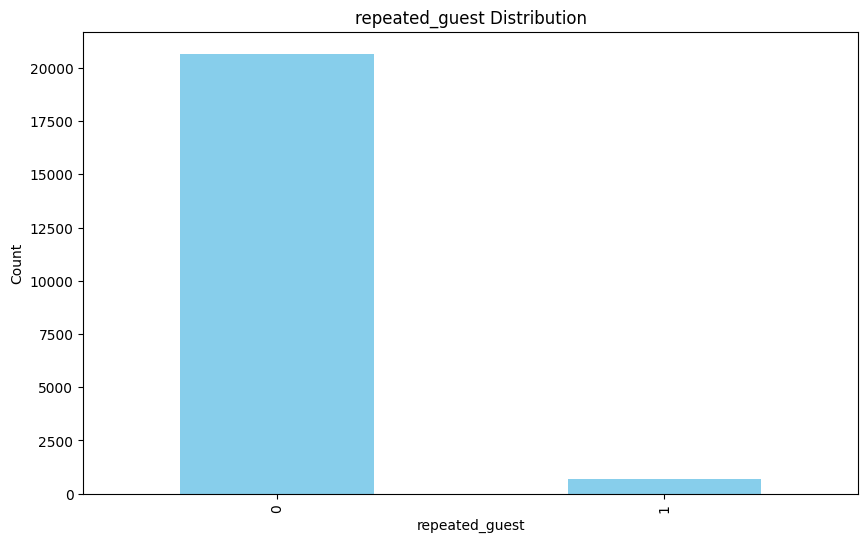

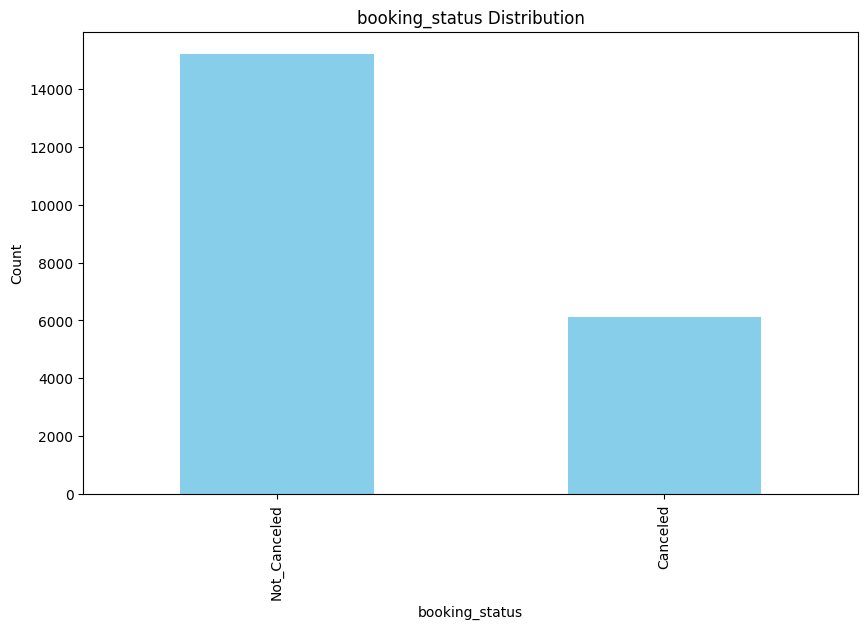

In [21]:
## now we will do univariate analysis for cat_cols

for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind="bar", color="skyblue")
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

## Bivaraite Analysis

In [22]:
##we will be using two columns for analysis 
## bivariate analysis for numerical features

def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()
    
    for i, column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} VS {target}")
    plt.tight_layout()
    plt.show()

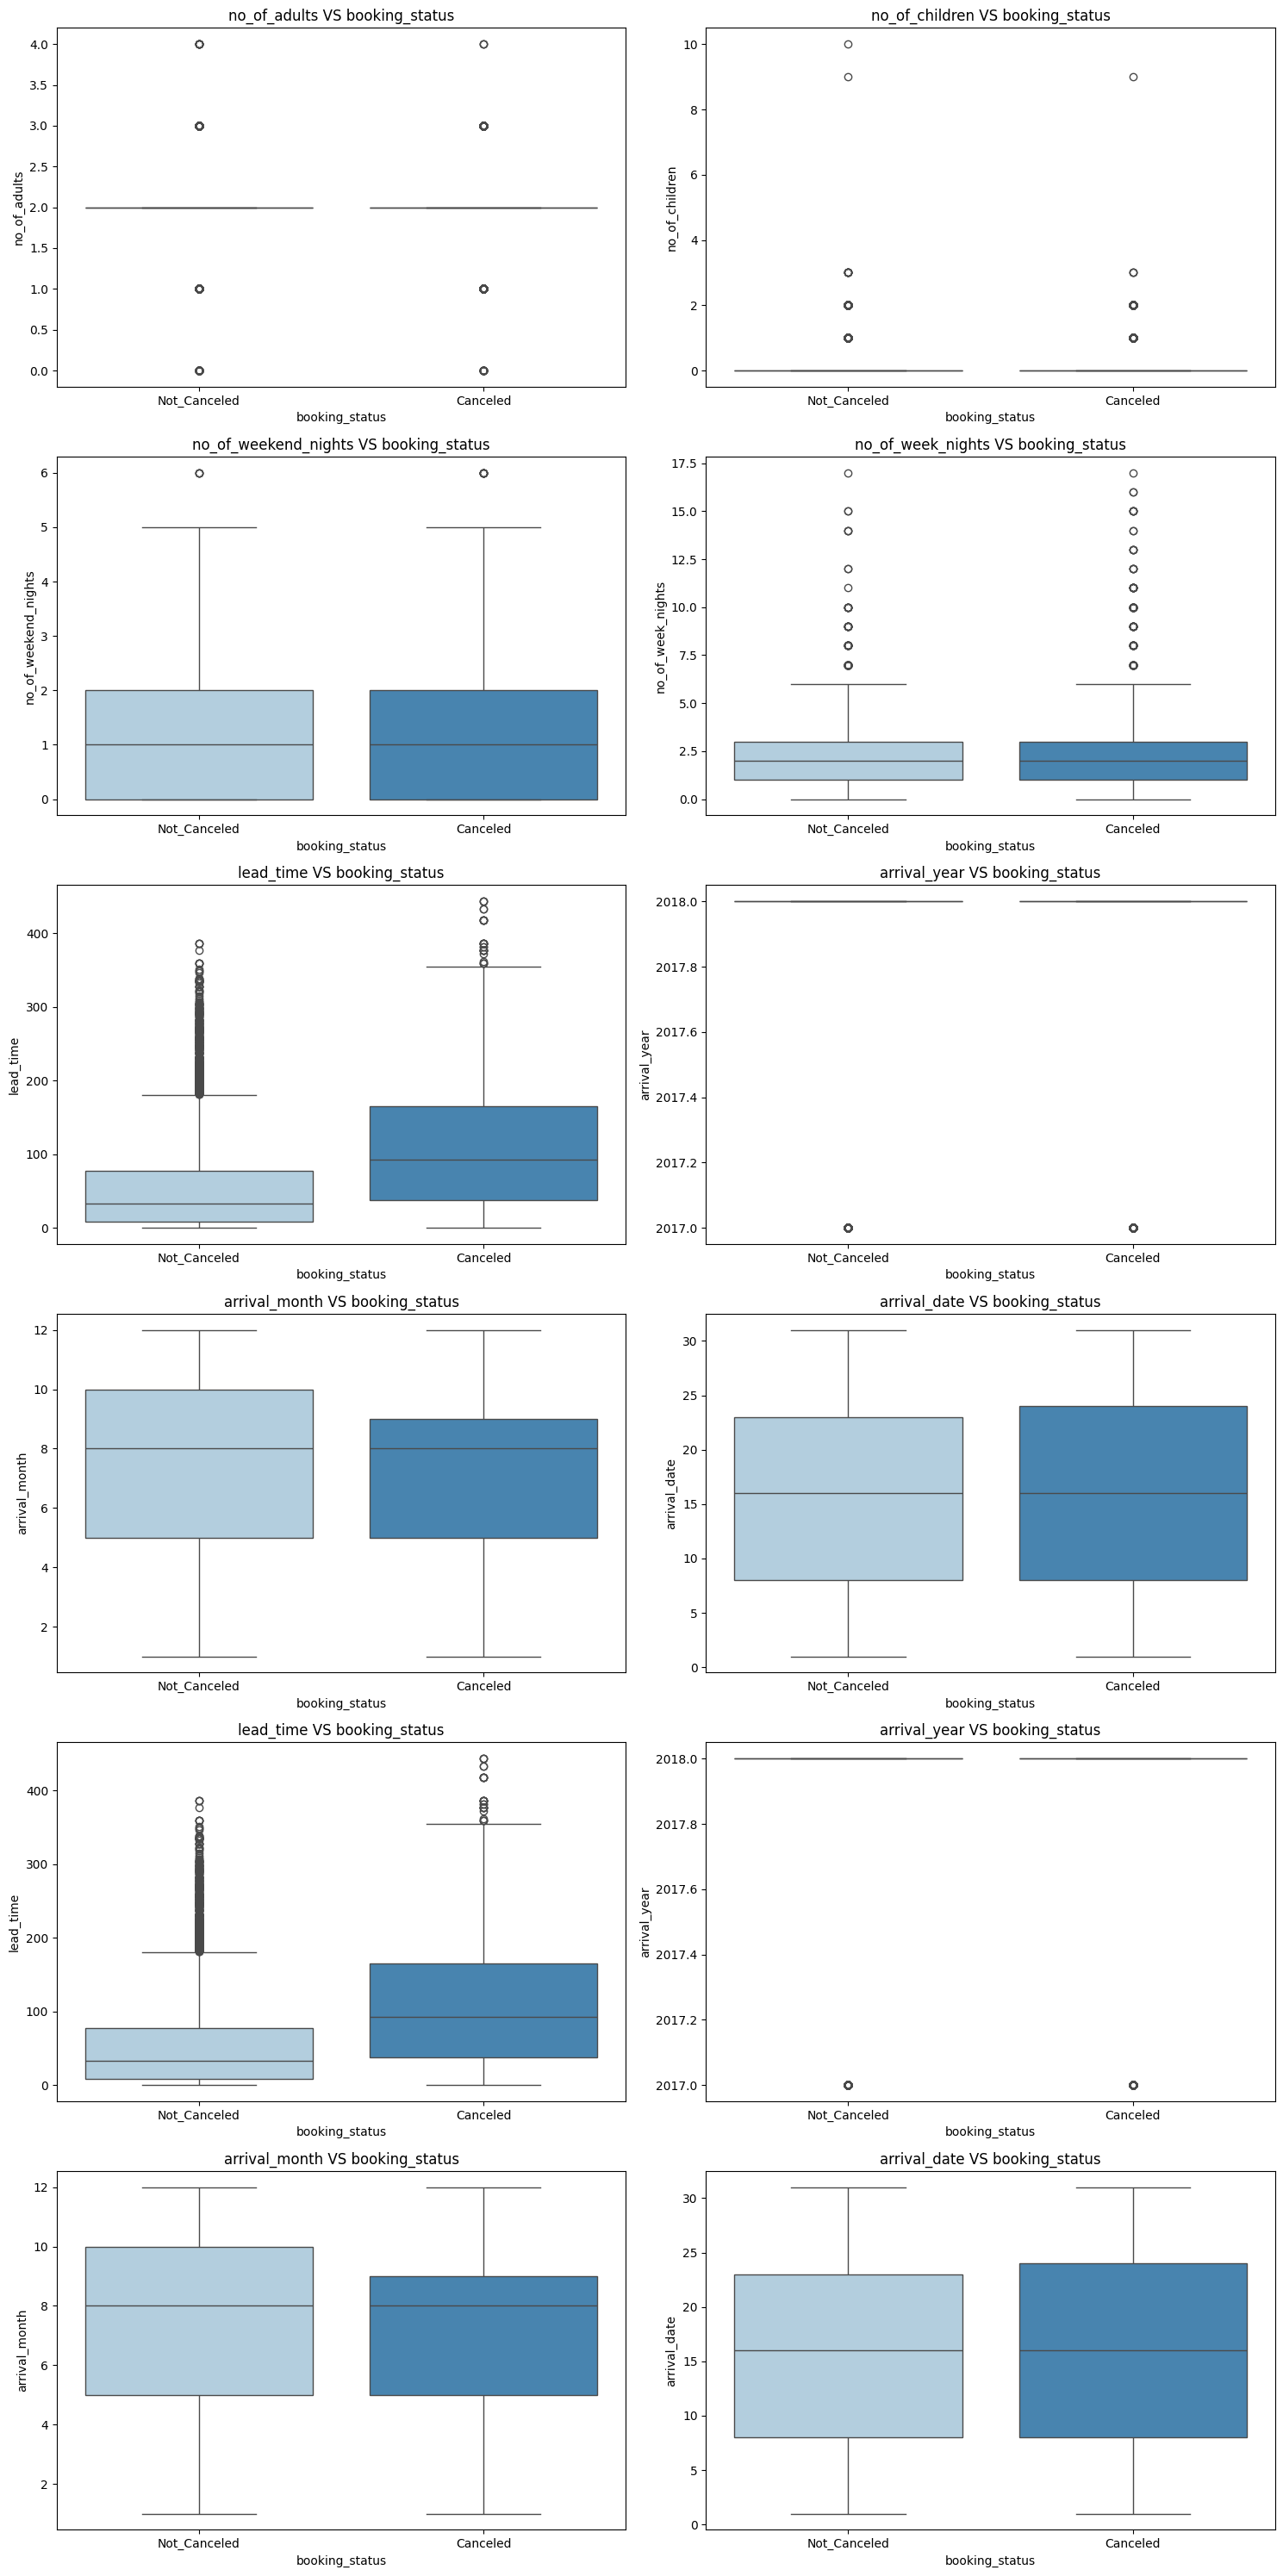

In [23]:
plot_bivariate_num(data, 'booking_status', num_cols)

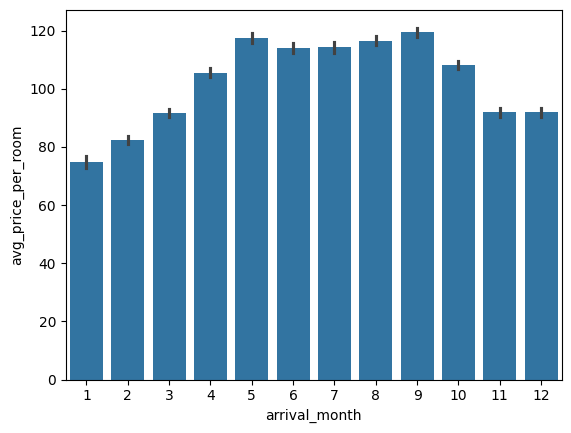

In [24]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show()

In [25]:
## bivariate analysis for cat_cols

def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()
    
    for i, feature in enumerate(cat_features):
        ## we will be using countplot for plotting categorical features
        ## countplot is only used for univariate analysis, so make it available for bivariate also we use hue
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax= axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        ## we will rotate the tick_params so that they do not collide
        axes[i].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

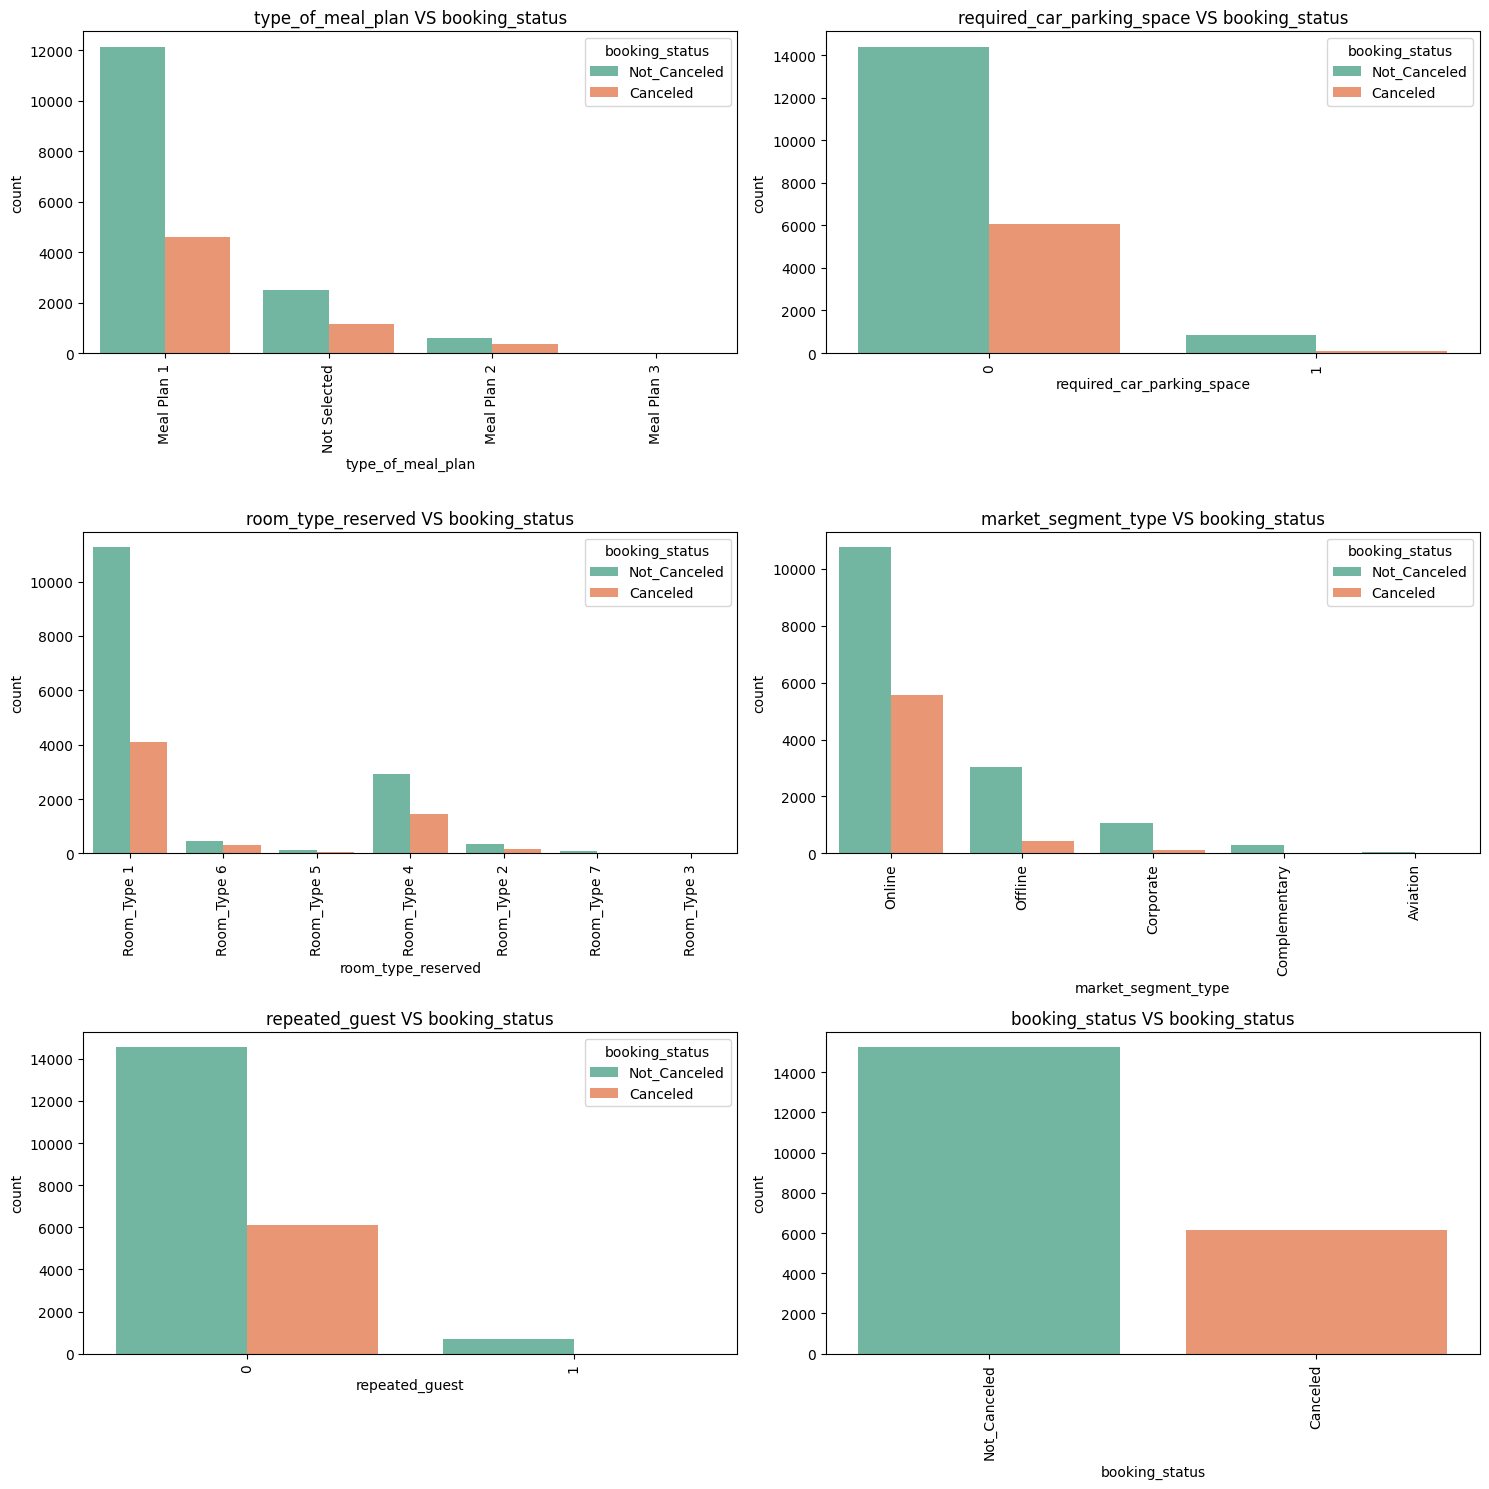

In [26]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

# Data Processing

In [27]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [29]:
## label encoding

from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
    mappings[col] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
    

In [31]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'repeated_guest': {0: 0, 1: 1},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [32]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [33]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [34]:
## Multicollinearity -> it tells us wheather our one column in dataset is highly related to another column in the dataset
### we have two types of features one is input feature and other is target feature
#### if the input features are correlated with each other, we call it multicollinearity and multicollinearity negatively effects our model
##### so we need to avoid it

!pip install statsmodels

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor ##it detects weather there is multicollinerity or not
from statsmodels.tools.tools import add_constant

In [36]:
X = add_constant(df) ## adding constant to our df

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns ## it will have all the columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]

In [37]:
vif_data ## if the number is above 5 then we can say there is multicollinearity, and if above 10 then we can say very high, but if the number is less like 1 or 2 then it is negligible

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


our data do not have multicollinearity

In [38]:
## correlation matrix for our data

corr = df.corr()

In [39]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

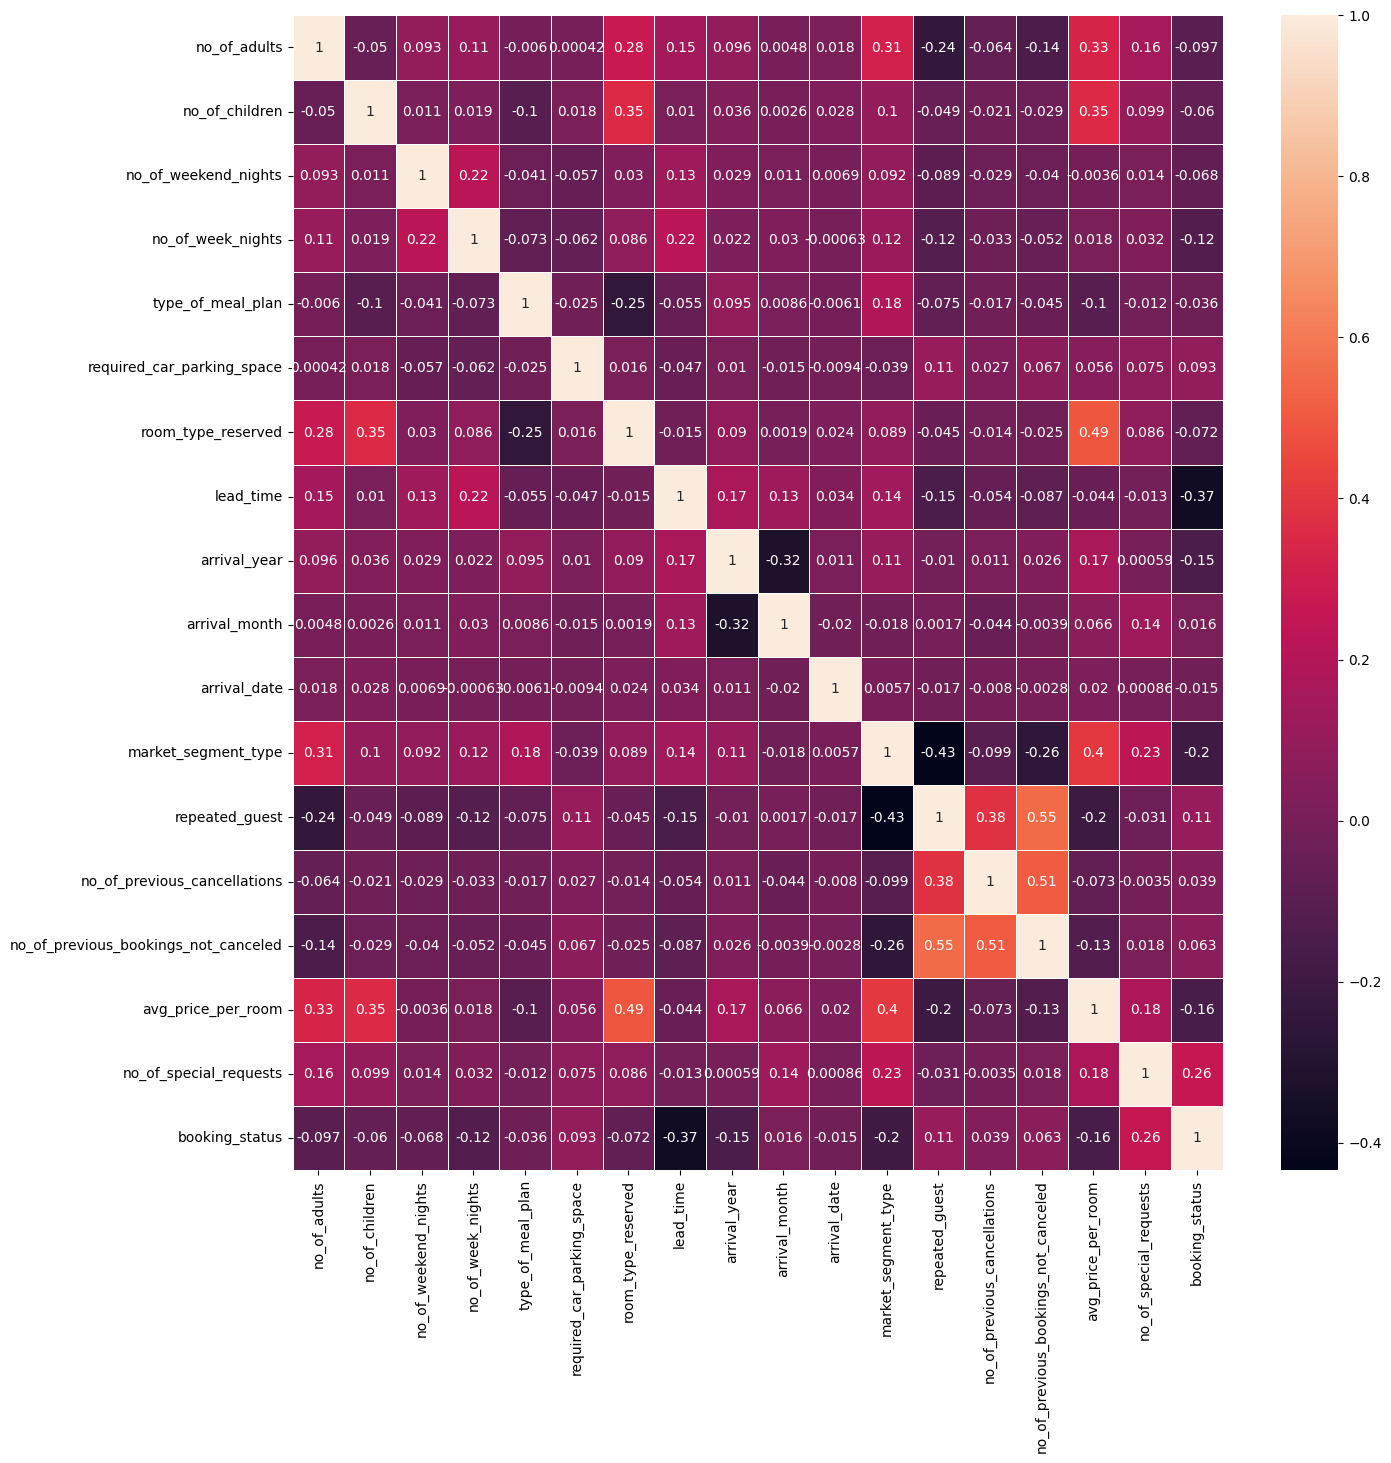

In [40]:
## this is very hactic to read so we will create a heatmap for this
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, linewidths=0.5)

In [41]:
## when the color is lighter or orange it means positively correlated
## when the color gets black means negatively correlated
## when the color is reddish ot means neutral

#### here lead_time is negatively correlated if compared to booking_status
##### as lead_time increases booking chances gets decreased

In [42]:
## skewness

skewness = df.skew()

In [43]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [44]:
# Skewness in a dataset refers to the asymmetry or lack of symmetry in the distribution of data points. It indicates whether the data is concentrated more on one side of the mean than the other. A skewed dataset is not a symmetrical distribution, like a normal distribution. 

## no_of_previous_cancellations            22.001489
## no_of_previous_bookings_not_canceled    16.735934 
### these two are highly skewed

In [45]:
## using log transformation

for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [46]:
## no_of_previous_cancellations            9.786170
## no_of_previous_bookings_not_canceled    5.591990 
### now it is ok

Handling Imbalanced Data

In [47]:
## Imbalanced Data

In [48]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [49]:
## we can do undersamppling but our data is less and it will get reduced from 20000 to 10000 which is not good
## so we will be doing oversampling

X = df.drop(columns="booking_status")
y = df["booking_status"]

In [50]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [51]:
!pip install imbalanced-learn

In [52]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE

In [55]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X,y) ## X resampling will get stored in x_res and ...


In [57]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [59]:
df.shape

(21359, 18)

In [62]:
## creating new dataFrame using resampled data

balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [63]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [64]:
balanced_df.shape

(30462, 18)

In [65]:
df = balanced_df.copy()

In [66]:
df.shape

(30462, 18)

In [67]:
## Feature Selection

len(df.columns)

18

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [70]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [71]:
feature_importance = model.feature_importances_

In [72]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

In [74]:
feature_importance_df.sort_values(by="importance", ascending=False)

,feature,importance
7,lead_time,0.260863
16,no_of_special_requests,0.182978
15,avg_price_per_room,0.148753
9,arrival_month,0.087115
10,arrival_date,0.084116
11,market_segment_type,0.058637
3,no_of_week_nights,0.044718
2,no_of_weekend_nights,0.030429
4,type_of_meal_plan,0.020350
6,room_type_reserved,0.019386


In [75]:
top_feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)

In [76]:
len(df.columns)

18

In [77]:
## lets select top 10 features

top_10_features = top_feature_importance_df["feature"].head(10).values
top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [78]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [79]:
len(top_10_df.columns)

11

In [80]:
df = top_10_df.copy()

## Model Selection

In [81]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 11.2 MB/s eta 0:00:12
   ---------------------------------------- 1.0/124.9 MB 3.9 MB/s eta 0:00:32
   ---------------------------------------- 1.3/124.9 MB 3.5 MB/s eta 0:00:36
   ---------------------------------------- 1.3/124.9 MB 3.5 MB/s eta 0:00:36
    --------------------------------------- 1.6/124.9 MB 1.6 MB/s eta 0:01:15
    --------------------------------------- 1.8/124.9 MB 1.7 MB/s eta 0:01:11
    --------------------------------------- 1.8/124.9 MB 1.7 MB/s eta 0:01:11
    --------------------------------------- 1.8/124.9 MB 1.7 MB/s eta 0:01:11
    --------------------------------------- 2.4/124.9 MB 1.2 MB/s eta 0:01:41
    --------------------------------------- 2.9/124.9 MB 1.5 MB/s eta 0:01:23
   - -------------------------------------- 3.4/124.9 MB 1.5 MB/s eta 0:01:20
   - -------------------------------------- 3.4/124.9 MB 1.5 MB/s eta 

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [84]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [86]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier" : SVC(random_state=42),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "AdaBoost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42)
}

In [88]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [89]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)
    
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

In [91]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.890202,0.893220,0.888274,0.890740
1,LogisticRegression,0.775152,0.803571,0.732899,0.766610
2,Gradient Boosting,0.835221,0.817846,0.865798,0.841139
3,Support Vector Classifier,0.720171,0.729412,0.706840,0.717949
4,Decision Tree,0.839652,0.850117,0.827687,0.838752
5,KNN,0.779747,0.856142,0.676547,0.755822
6,Naive Bayes,0.773182,0.803161,0.728339,0.763922
7,XGboost,0.872641,0.868573,0.880456,0.874474
8,AdaBoost,0.819137,0.810019,0.837459,0.823511
9,LGBM,0.865255,0.850421,0.888925,0.869247


In [92]:
### Train our RF Model ###

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint ## randomly pick parameters and check which are good from this range to that range

In [94]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [96]:
rf = RandomForestClassifier(random_state=42)

In [102]:
##rf parameters
params_dist = {
    'n_estimators': randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5),
    'bootstrap': [True, False]
}

In [103]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5, ##cross validation
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [104]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.9s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026296BCB310>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026296BCB640>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000262922AD490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000262922AD280>},
                   random_state=42, scoring='accuracy', verbose=2)

In [105]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [ ]:
best_rf_model = random_search.best_estimator_ ## best estimator gives you the model with upper parameters

In [107]:
y_pred = best_rf_model.predict(X_test)

In [108]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

In [109]:
accuracy

0.8913507303462991

In [110]:
precision

0.8891402714932126

In [111]:
recall

0.8960912052117264

In [112]:
f1

0.8926022063595068

In [113]:
### Save this Model

In [114]:
import joblib

In [115]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [116]:
loaded_model = joblib.load("random_forest.pkl")

In [117]:
##prediction

X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [120]:
new_data = np.array([190, 1, 93.5, 9, 8, 4, 5, 2, 0, 0]).reshape(1,-1)

In [121]:
predictions = loaded_model.predict(new_data)

In [122]:
predictions

array([1])

In [123]:
## hotel reservation will not get canceled